***
# <font color=green size=10>ESTADÍSTICAS CON PYTHON</font>
***

### ¿Por qué estudiar Estadística?

La **estadística** puede ser muy importante para una efectiva toma 
de decisiones. Existe una gran cantidad de valiosa información 
escondida entre los datos, pero esta información no suele ser fácilmente accesible, la estadística nos brinda los principios fundamentales que nos permiten extraer y entender esa información; tambien nos proporciona las herramientas necesarias para verificar la calidad de nuestros datos y nuestra información.

Existen 2 tipos de Estadística:
1. Estadística Descriptiva
2. Estadística Inferencial

## Conociendo la base de datos

In [1]:
# librerias
import pandas as pd

# obtener datos
df = pd.read_csv('base.csv')
df.head()

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [2]:
# size del df
df.shape

(76840, 7)

In [3]:
# evaluacion de valores faltantes por variable
df.isnull().sum()

CodPostal       0
Sexo            0
Edad            0
Color           0
Años_Estudio    0
Renta           0
Altura          0
dtype: int64

# <font color=green>1. ESTADÍSTICA DESCRIPTIVA</font>
***

Se dedica a recolectar, ordenar, analizar y representar a un conjunto de datos, con el fin de describir apropiadamente sus características. Calcula los parámetros estadísticos que describen el conjunto estudiado. Algunas de las herramientas que utiliza son gráficos, distribuciones de frecuencias, medidas de centralización, medidas de posición, medidas de dispersión, entre otras.

## <font color=green>1.1 Distribuciones de Frecuencia</font>
***

### Distribuciones de frecuencia para una variable cualitativa

In [4]:
# para la variable sexo
freq = df['Sexo'].value_counts()
freq

0    53250
1    23590
Name: Sexo, dtype: int64

- 0 para masculino, 1 para femenimo
- Hay 53250 hombres y 23590 mujeres, una gran diferencia entre ambos

In [5]:
# distribucion de frecuencia en porcentaje
pct = df['Sexo'].value_counts(normalize=True)*100
pct

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

- El 31% de los registros corresponden a mujeres
- El 69% de los registros son hombres

In [6]:
# mostrar ambos resultados 
dist_freq_sex = pd.DataFrame({'Frecuencia': freq, 'Porcentaje (%)': pct})
dist_freq_sex

,Frecuencia,Porcentaje (%)
0,53250,69.299844
1,23590,30.700156


### Distribuciones de frecuencia para más de una variable cualitativa

In [7]:
# categorias
sexo = {0: 'Masculino', 
        1: 'Femenino'}

color = {0: 'Indígena', 
         2: 'Blanca', 
         4: 'Negra', 
         6: 'Amarilla', 
         8: 'Marrón', 
         9: 'NA'}

In [8]:
# combinar conteo de sexo y color de piel mediante una tabla de contingencia
# primer parametro: filas, Segundo parametro: columnas
freq = pd.crosstab(df.Sexo, df.Color)
freq

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


- Hay mayor cantidad de personas de piel marron: 25063 hombres y 10862 mujeres
- Hay menor cantidad de personas indigenas: 256 hombres y 101 mujeres

In [9]:
# agregar los nombres al dataframe anterior para entenderlo mejor y los valores en porcentaje
pct = pd.crosstab(df.Sexo, df.Color, normalize=True)*100
pct.rename(index=sexo, inplace=True)
pct.rename(columns=color, inplace=True)
pct

Color,Indígena,Blanca,Negra,Amarilla,Marrón
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Femenino,0.131442,12.520822,3.759761,0.152264,14.135867


**Mostrar la media de la renta tanto para hombre como mujeres segun el color de piel**

In [10]:
pct = pd.crosstab(df.Sexo, df.Color, aggfunc='mean', values=df.Renta)
pct.rename(index=sexo, inplace=True)
pct.rename(columns=color, inplace=True)
pct

Color,Indígena,Blanca,Negra,Amarilla,Marrón
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Femenino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


- Los hombres y mujeres asiaticas (piel amarilla) son los que ganan mas.\
- Los hombres que ganan menos son los indigenas.
- Las mujeres que ganan menos son las afrodescendientes.

**Que poblacion es mas alta?**

In [11]:
mean_Altura = pd.crosstab(df.Sexo, df.Color, aggfunc='mean', values=df.Altura)
mean_Altura.rename(index=sexo, inplace=True)
mean_Altura.rename(columns=color, inplace=True)
mean_Altura

Color,Indígena,Blanca,Negra,Amarilla,Marrón
Sexo,,,,,
Masculino,1.701357,1.699400,1.700704,1.695750,1.699219
Femenino,1.698907,1.700432,1.698065,1.702507,1.699398


- Los hombres indigenas tienden a ser los mas altos
- En cuanto a las mujeres, las asiaticas son las mas altas

### Distribuciones de frecuencia para variables cuantitativas

#### Paso 1 - Definiendo el número de clases con la **Regla de Sturges**
Sugiere que el numero optimo de clases k en un histograma puede calcularse mediante la siguiente formula:

$$k = 1 + \frac {10}{3}\log_{10}n$$

Un numero adecuado de clases ayuda a representar de manera efectiva la distribucion de los datos sin sobrecargar el histograma con demasiada informacion. Puede no ser optima cuando se trabaja con conjuntos de datos pequenos o distribuciones no normales

In [12]:
# importar libreria
import numpy as np

# calcular cantidad de registros del dataframe
n = df.shape[0]

# calcular k
k = 1 + (10/3)*np.log10(n)

# redondear valor de k y convertir en entero
k = int(k.round(0))

k

17

#### Paso 2 - Crear frecuencias

In [13]:
# distribucion de frecuencia de Renta
freq = pd.value_counts(
    pd.cut(
        x=df.Renta,
        bins=k,  # cantidad de categorias
        include_lowest=True  # incluir valores negativos, si los hay
    ),
    sort = False  # no ordenar los valores
)

freq

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renta, dtype: int64

In [14]:
# mostrar recuento en porcentaje
pct = pd.value_counts(
    pd.cut(
        x=df.Renta,
        bins=k,  # cantidad de categorias
        include_lowest=True  # incluir valores negativos, si los hay
    ),
    sort = False,  # no ordenar los valores
    normalize=True
)*100

pct

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Renta, dtype: float64

- El 98% de las personas ganan entre -200 y 11764.
- 1.3% de las personas ganan entre 11764 y 23529.
- El resto de las personas ganan dinero mayor a 23529.

In [15]:
# mostrar resultados anteriores en un dataframe
dist_freq_Renta = pd.DataFrame({'Frecuencia': freq, 'Porcentaje (%)': pct})
dist_freq_Renta

,Frecuencia,Porcentaje (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


## <font color=green>1.2 Histogramas</font>
***
El <b>HISTOGRAMA</b> es la representación gráfica de una distribución de frecuencias. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

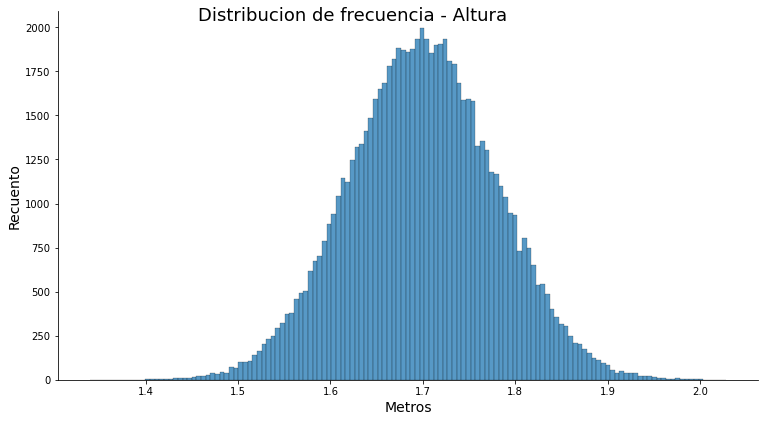

In [16]:
# importar libreria
import seaborn as sns

# mostrar la distribucion de frecuencias de la Altura
ax = sns.displot(df.Altura)
# tamano grafico
ax.figure.set_size_inches(12,6)
# etiquetas de los ejes
ax.figure.suptitle('Distribucion de frecuencia - Altura', fontsize=18)
ax.set_axis_labels('Metros', fontsize=14)
ax.set_ylabels('Recuento', fontsize=14);

- La mayoria de las personas miden alrededor de 1.70 mts
- En menor cantidad, miden 1.6 y 1.8 mts
- Solo algunas miden 1.5 y 1.90 mts
- Una o dos miden 1.4 y 2 mts.

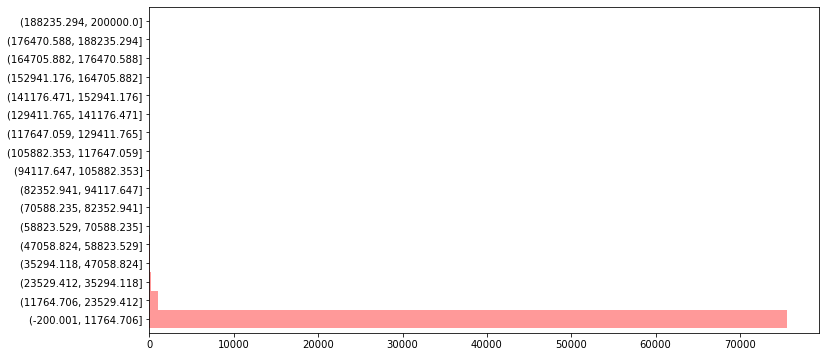

In [17]:
# Mostrar histograma de la tabla de frecuencia de Renta
dist_freq_Renta['Frecuencia'].plot.barh(
    width=1,      # ancho de barras
    color='red',  # color barras
    alpha=0.4,    # transparencia barras
    figsize=(12,6)# tamano del grafico
);

## <font color=green>1.3 Media aritmética</font>
***

Se representa por $\mu$ cuando se refiere a la población y por $\bar{X}$ cuando se refiere a la muestra

$$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

donde

$n$ = número de observaciones (registros)

$X_i$ = valor de la i-ésima observación (registro)

In [18]:
# extraer una muestra de 5 valores
muestra = df.head(5)
muestra

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


**calcular la media aritmetica de la Edad**

In [19]:
muestra.Edad.mean()

34.8

**calcular la media aritmetica de la Renta**

In [20]:

muestra.Renta.mean()

1296.0

**calcular la media de la Renta tanto para los hombres como para las mujeres en los datos originales**

In [21]:
df.groupby(['Sexo'])['Renta'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renta, dtype: float64

**calcular el promedio de la Renta para cada tipo de piel**

In [22]:
df.groupby(['Color'])['Renta'].mean()

Color
0    1472.887955
2    2679.019331
4    1442.294840
6    4182.920455
8    1513.596103
Name: Renta, dtype: float64

**Calcular el promedio de la renta segun la zona de residencia**

In [23]:
df.groupby(['CodPostal'])['Renta'].mean()

CodPostal
11    1789.761223
12    1506.091782
13    1445.130100
14    1783.588889
15    1399.076871
16    1861.353516
17    1771.094946
21    1019.432009
22    1074.550784
23    1255.403692
24    1344.721480
25    1293.370487
26    1527.079319
27    1144.552602
28    1109.111111
29    1429.645094
31    2056.432084
32    2026.383852
33    2496.403168
35    2638.104986
41    2493.870753
42    2470.854945
43    2315.158336
50    2262.604167
51    2130.652778
52    1994.580794
53    4241.954722
Name: Renta, dtype: float64

## <font color=green>1.4 Mediana</font>
***

A veces la media no describe el punto de equilibrio real de los datos ya que es suceptible a valores atipicos, es decir, la presencia de valores fuera del rango normal hace que la media se mueva fuera del centro. En estos caso la Mediana describe mejor el equilibrio. Para encontrar la mediana de un conjunto de datos, realizaremos lo siguiente:
1. Ordenamos el conjunto de datos;
2. Identificamos el número de observaciones (registros) en el conjunto de datos ($n$);
3. Identificamos el elemento mediano.

> Cuando $n$ es impar:
$$Elemento_{Md} = \frac{n+1}2$$

> Cuando $n$ es par:
$$Elemento_{Md} = \frac{n}2$$
4. Obtenemos la mediana:

> Cuando $n$ es impar:


$$Md = X_{Elemento_{Md}}$$

> Cuando $n$ es par:

$$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Ejemplo 1 - n impar

<img src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_1_4.png' width='40%' style="float:left">

In [24]:
# creamos una muestra de los ultimos 5 registros de los datos originales
muestra2 = df.tail()
muestra2

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344
76839,53,0,38,8,4,900,1.658305


**Calcular la mediana (sin utilizar metodos) de los años de estudio de la muestra**

In [25]:
# ordenamos de menor a mayor
muestra2 = muestra2.Años_Estudio.sort_values()
# reiniciamos los indices de la muestra para que inicien en 0. Mostrar solo valores de Años_Estudio
muestra2 = muestra2.reset_index().Años_Estudio

muestra2

0     4
1     4
2     7
3    11
4    12
Name: Años_Estudio, dtype: int64

In [26]:
# calcular cantidad de registros
n = muestra2.shape[0]
# calcular ubicacion de la mediana
elemento_md = (n+1)/2
# buscar la mediana en la muestra
mediana = muestra2.loc[elemento_md - 1]

mediana

7

**Calcular la mediana mediante un metodo directo**

In [27]:
muestra2.median()

7.0

### Ejemplo 2 - n par

<img src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_1_4_2.png' width='50%' style="float:left">

In [28]:
# crear una muestra de 6 registros de los datos originales
muestra3 = df.tail(6)
muestra3

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
76834,53,1,35,4,1,1100,1.741089
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344
76839,53,0,38,8,4,900,1.658305


**Calcular la mediana de la edad (sin metodos directos) para la muestra**

In [29]:
# ordenamos de menor a mayor
muestra3 = muestra3.Edad.sort_values()
# reiniciamos los indices y tomar solo la columna de Edad
muestra3 = muestra3.reset_index().Edad

muestra3

0    30
1    32
2    35
3    38
4    46
5    57
Name: Edad, dtype: int64

In [30]:
# calcular cantidad de registros
n = muestra3.shape[0]
# calcular ubicacion de la mediana
element_md = n/2
# calcular mediana
mediana = (muestra3[element_md] + muestra3[element_md - 1])/2

mediana

36.5

**Calcular mediana de la edad de la muestra mediante metodo directo**

In [31]:
muestra3.median()

36.5

### Obteniendo la mediana en nuestro dataset

In [32]:
# Promedio Años_Estudio
df.Años_Estudio.mean()

9.469664237376367

In [33]:
# Mediana Años_Estudio
df.Años_Estudio.median()

11.0

- La ligera diferencia entre la media y la mediana de los Años de Estudio indica un sesgo en la distribucion de los datos

## <font color=green>1.5 Moda</font>
***

La moda se puede definir como el valor más frecuente en un conjunto de datos. La moda se usa a menudo para datos cualitativos.

In [34]:
# crear un subconjunto de datos de los datos originales
test = df[['Edad','Color','Años_Estudio']].head()
test

,Edad,Color,Años_Estudio
0,23,8,12
1,23,2,12
2,35,8,15
3,46,2,6
4,47,8,9


**Calcular la moda para cada una de las variables**

In [35]:
test.mode()

,Edad,Color,Años_Estudio
0,23,8,12


### Obteniendo la moda en nuestro dataset

In [36]:
# moda para la Renta
df.Renta.mode()

0    788
Name: Renta, dtype: int64

- El resultado indica que la renta mas frecuente es de 788$

In [37]:
# moda para la altura
df.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

- Hay 9 modas para la altura. A esto se conoce como Multimodal

## <font color=green>1.6 Cuartiles, deciles y percentiles</font>
***

Hay una serie de medidas de posición similares en diseño a la mediana, aunque no son medidas de tendencia central. Como es sabido, la mediana divide la distribución en dos partes iguales en función del número de elementos de cada parte. Los cuartiles, por su parte, permiten dividir la distribución en cuatro partes iguales en función del número de elementos en cada una; deciles en diez partes y percentiles en cien partes iguales.

In [38]:
# obtener la mediana de la Renta por medio de cuartiles
df.Renta.quantile(0.5)

1200.0

In [39]:
# obtener la median de la Renta
df.Renta.median()

1200.0

In [40]:
# dividir los datos de Renta en 4 rangos de igual cantidad de datos
df.Renta.quantile([0.25, 0.50, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renta, dtype: float64

In [41]:
# otra forma de obtener los cuartiles de una variable
df.Renta.describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renta, dtype: float64

In [42]:
# obtener los deciles de Renta
df.Renta.quantile([i/100 for i in range(1,10)])

0.01      0.0
0.02      0.0
0.03      0.0
0.04     50.0
0.05    100.0
0.06    180.0
0.07    200.0
0.08    280.0
0.09    300.0
Name: Renta, dtype: float64

## <font color=green>1.7 Box-plot</font>
***

El Box-plot da una idea de posición, dispersión, asimetría, colas y valores atípicos (outliers). La posición central viene dada por la mediana y la dispersión por $IIQ$. Las posiciones relativas de $Q1$, $Mediana$ y $Q3$ dan una idea de la simetría de la distribución. Las longitudes de cola están dadas por las líneas que van desde el rectángulo hasta los valores remotos y los valores atípicos.

<img src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_1_7.png' width='65%'>

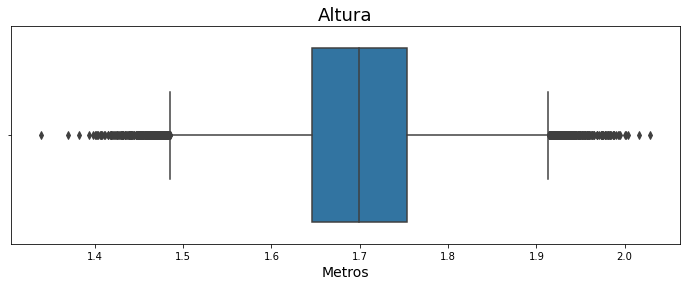

In [43]:
# Boxplot de la Altura
ax = sns.boxplot(x='Altura', data=df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax;

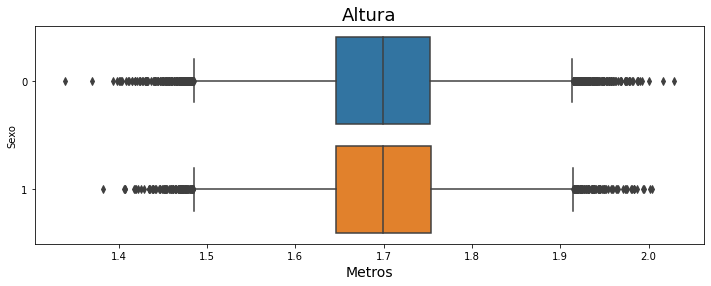

In [44]:
# Boxplot de la altura segun el sexo
ax = sns.boxplot(x='Altura', y='Sexo', data=df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax;

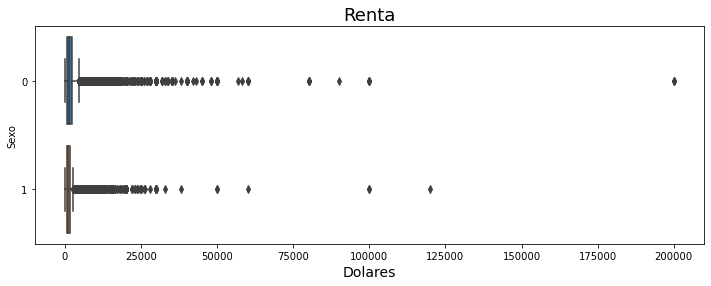

In [45]:
# Boxplot de la Renta por sexo
ax = sns.boxplot(x='Renta', y='Sexo', data=df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Renta', fontsize=18)
ax.set_xlabel('Dolares', fontsize=14)
ax;

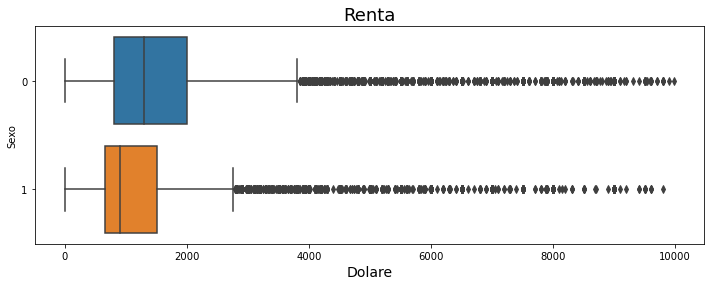

In [46]:
# boxplot de personas que ganan menos de 10.000 segun el sexo
ax = sns.boxplot(x='Renta', y='Sexo', data=df.query('Renta < 10000'), orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Renta', fontsize=18)
ax.set_xlabel('Dolare', fontsize=14)
ax;

- Los graficos indican que los hombres ganan un poco mas que las mujeres

## <font color=green>1.8 Desviación Media Absoluta</font>
***


$$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [47]:
# extraemos una muestra de 8 registros de la Edad
test = df[['Edad']].tail(8)
test

,Edad
76832,49
76833,30
76834,35
76835,46
76836,30
76837,32
76838,57
76839,38


**Calcular la Desviacion Media Absoluta de forma manual**

In [48]:
# calculamos la edad media
edad_media = test.mean()[0]

# creamos una nueva columna en el df para guardar los residuos de cada medida
test['Residuos'] = test['Edad'] - edad_media
test

,Edad,Residuos
76832,49,9.375
76833,30,-9.625
76834,35,-4.625
76835,46,6.375
76836,30,-9.625
76837,32,-7.625
76838,57,17.375
76839,38,-1.625


In [49]:
# si sumamos los residuos, el resultado tiende a cero debido a que se cancelan
# es por ello que antes de sumarlo, debemos aplicar el valor absoluto
test['Residuos'].sum()

0.0

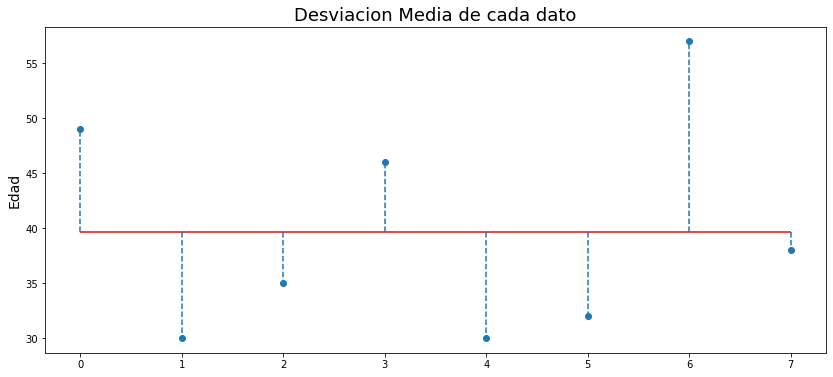

In [50]:
# veamos graficamente la Desviacion Media Absoluta

test = test.reset_index()
# grafico de la Edad
ax = test['Edad'].plot(style='o')
# dimension del grafico
ax.figure.set_size_inches(14, 6)
# trazar la linea de la media
ax.hlines(y=edad_media, xmin=0, xmax=test.shape[0] - 1, colors='red')
# dibuja lineas puntadas que represente la desviacion para cada punto
for i in range(test.shape[0]):
    ax.vlines(x=i, ymin=edad_media, ymax=test['Edad'][i], linestyles='dashed')
ax.set_title('Desviacion Media de cada dato', fontsize=18)
ax.set_ylabel('Edad', fontsize=14)
ax;

In [51]:
# aplicamos el valor absoluto a los residuos y obtenemos la media
test['Residuos'].abs().mean()

8.28125

**Obtener la Desviacion Media Absoluta con Python**

In [52]:
test['Edad'].mad()

8.28125

## <font color=green>1.9 Varianza</font>
***

### Varianza

La varianza se construye a partir de las diferencias entre cada observación y la media de los datos, es decir, la desviación alrededor de la media. Al calcular la varianza, las desviaciones alrededor de la media se elevan al cuadrado.

### Varianza muestral

$$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

**Obtener la Varianza muestral manualmente**

In [53]:
# vamos a trabajar con la muestra anterior
test

,index,Edad,Residuos
0,76832,49,9.375
1,76833,30,-9.625
2,76834,35,-4.625
3,76835,46,6.375
4,76836,30,-9.625
5,76837,32,-7.625
6,76838,57,17.375
7,76839,38,-1.625


In [54]:
# creamos una nueva columna para almacenar los valores de los residuos al cuadrado
test['(Residuos)^2'] = test['Residuos'].pow(2)
test

,index,Edad,Residuos,(Residuos)^2
0,76832,49,9.375,87.890625
1,76833,30,-9.625,92.640625
2,76834,35,-4.625,21.390625
3,76835,46,6.375,40.640625
4,76836,30,-9.625,92.640625
5,76837,32,-7.625,58.140625
6,76838,57,17.375,301.890625
7,76839,38,-1.625,2.640625


In [55]:
# calculamos la varianza muestral
varianza = (test['(Residuos)^2'].sum()) / (len(test) - 1)
varianza

99.69642857142857

**Obtener la varianza muestral con Python**

In [56]:
test['Edad'].var()

99.69642857142857

## <font color=green>1.10 Desviación estandar</font>
***

Una de las limitaciones de la varianza es que proporciona medidas en cuadrados de las unidades originales; la varianza de las medidas de longitud, por ejemplo, está en unidades de área. Por tanto, el hecho de que las unidades sean diferentes dificulta la comparación de la dispersión con las variables que la definen. Una forma de eliminar esta dificultad es considerar su raíz cuadrada.

### Desviación estandar muestral

$$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

**Obtener la Desviacion Estandar de forma manual**

In [57]:
# importamos libreria
import numpy as np

In [58]:
# calculamos la raiz cuadrada del valor almacendado en varianza
np.sqrt(varianza)

9.98480989160177

**Obtener la Desviacion Estandar con Python**

In [59]:
test['Edad'].std()

9.98480989160177

**Metodo que muestra los estadisticos mas importantes de cada variable**

In [60]:
df.describe()

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


# <font color=green>2. ESTADÍSTICA INFERENCIAL</font>
***

Se dedica a estudiar cómo sacar conclusiones generales para toda la población a partir del estudio de una muestra, y el grado de fiabilidad o significación de los resultados obtenidos. Sus principales herramientas son el muestreo, la estimación de parámetros y el contraste de hipótesis.

## <font color=green>2.1 Distribución Binomial</font>
***

Un evento **binomial** se caracteriza por la posibilidad de ocurrencia de solo dos categorías. Estas categorías juntas representan todo el espacio muestral, y además son mutuamente excluyentes, es decir, la ocurrencia de una implica la no ocurrencia de la otra.

En el análisis estadístico, el uso más común de la distribución binomial es para resolver problemas de situaciones de **éxito** y **fracaso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de éxito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = número de eventos estudiados

$k$ = número de eventos deseados que tengan éxito

### Combinaciones

Es importante resaltar que la expresión entre paréntesis no es una expresión matricial, sino que es el resultado de una combinación sin repetición. Este se obtiene con la siguiente fórmula:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definición:

## $$0! = 1$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [61]:
# libreria para calcular combinaciones
from scipy.special import comb

## <font color='blue'>Ejemplo: Mega Sorteo</font>

En un billete de lotería Mega Sorteo tenemos un total de **60 números** a elegir donde la apuesta mínima es de **seis números**. Tú que tienes curiosidad decides calcular la probabilidad de ganar el Mega Sorteo con solo **un juego**. Para ello necesitamos saber cuántas **combinaciones de seis números se pueden formar con los 60 números disponibles**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [62]:
# calcular todas las combinaciones
combinaciones = comb(60, 6)
combinaciones

50063860.0

In [63]:
# calcular probabilidad de ganar
proba = 1/combinaciones
print('%0.15f' % proba)

0.000000019974489


## <font color='blue'>Ejemplo: Concurso para Data Scientist</font>

En un concurso para cubrir una vacante de científico de datos tenemos un total de **10 preguntas de opción múltiple** con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Supongamos que un candidato decide aventurarse sin haber estudiado nada en absoluto. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y el puntaje de corte es 5**, obtenga la probabilidad de que este candidato **responda correctamente 5 preguntas** y también la probabilidad de que este candidato **pase a la siguiente etapa del proceso de selección**.

### ¿Cual es la cantidad de preguntas o ensayos ($n$)?

In [64]:
# numero de ensayos
n =10

### ¿Cuál es la probabilidad de éxito ($p$)?

In [65]:
numero_de_altenativa_por_pregunta = 3
p = 1 / numero_de_altenativa_por_pregunta
p

0.3333333333333333

### ¿Cuál es la probabilidad de fracaso ($q$)?

In [66]:
q = 1 - p
q

0.6666666666666667

### ¿Cuál es el número de eventos que se desea tener éxito ($k$)?

In [67]:
k = 5

### Solución 1

In [68]:
proba = comb(n, k)*(p**k)*(q**(n-k))
print('%0.8f' % proba)

0.13656455


### Solución 2

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [69]:
# libreria para calcular probabilidad 
from scipy.stats import binom

In [70]:
proba = binom.pmf(k, n, p)
print('%0.8f' % proba)

0.13656455


### Obtener la probabilidad de que el candidato pase la prueba

### $$P(Aprobado \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P10)$$

In [71]:
binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)

0.21312808006909492

In [72]:
# otra alternativa
binom.pmf([5,6,7,8,9,10], n, p).sum()

0.21312808006909492

## <font color='blue'>Ejemplo: Yincana</font>

En un pueblo se organiza una yincana todos los años para recaudar fondos para el hospital de la ciudad. Se sabe que la **proporción de mujeres participantes en la yincana es del 60%**. **El número total de equipos, con 12 integrantes, inscritos para la yincana de este año es de 30**. Con la información anterior responde: ¿Cuántos equipos deben estar formados por **8 mujeres**?

### Solución

In [73]:
# probabilidad de exito
p = 0.6
p

0.6

In [74]:
# total de eventos
n = 12
n

12

In [75]:
# número de eventos deseados que tengan éxito
k = 8
k

8

In [76]:
# probabilidad de que un equipo este formado por 8 mujeres
proba = binom.pmf(k, n, p)
print('%0.8f' % proba)

0.21284094


### Media de la distribución binomial

El valor esperado o la media de una distribución binomial es igual al número de experimentos realizados multiplicado por la posibilidad de que ocurra el evento.

# $$\mu = n \times p$$

In [77]:
# calcular cuantos eventos podemos obtener a partir de la probabilidad calculada

# cantidad de experimentos
m = 30

# total de equipos
equipos = 30 * proba
equipos


6.3852281856

## <font color=green>2.2 Distribución Poisson</font>
***

Se utiliza para describir el número de ocurrencias en un tiempo o espacio específico. Los eventos se caracterizan por la posibilidad de contar los éxitos, pero la imposibilidad de contar los fracasos.

Como ejemplos de procesos donde podemos aplicar la distribución de Poisson tenemos la determinación de la cantidad de clientes que ingresan a una tienda a una hora determinada, la cantidad de autos que llegan a un drive-thru de una cafetería a la hora del almuerzo, la determinación de el número de accidentes registrados en un tramo de carretera, etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Donde:

$e$ = constante cuyo valor aproximado es 2.718281828459045

$\mu$ = representa el número promedio de ocurrencias en un intervalo de tiempo o espacio determinado

$k$ = número de éxitos en el rango deseado

In [78]:
# obtener valor de e
import numpy as np
np.e

2.718281828459045

## <font color='blue'>Ejemplo: Delivery</font>

Un restaurante recibe una media de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado elegido al azar, el restaurante reciba **15 pedidos**?

### ¿Cuál es el promedio de visitas por hora ($\mu$)?

In [79]:
media = 20
media

20

### ¿Cuántas ocurrencias queremos obtener en el período ($k$)?

In [80]:
k = 15
k

15

### Solución 1

In [81]:
proba = (np.e**-media) * (media**k) / (np.math.factorial(k))
print('%0.8f' %proba)

0.05164885


### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solución 2

In [82]:
# importar la libreria para calcular prob de Poisson
from scipy.stats import poisson

# calcular probabilidad
proba = poisson.pmf(k, media)
print('%0.8f' %proba)


0.05164885


## <font color=green>2.3 Distribución Normal</font>
***

La distribución normal es una de las más utilizadas en estadística. Es una distribución continua, donde la distribución de frecuencias de una variable cuantitativa tiene forma de campana y es simétrica con respecto a su media.

$$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media o promedio

La probabilidad se obtiene a partir del área bajo la curva, delimitada por los límites inferior y superior especificados. Un ejemplo se puede ver en la siguiente figura.

![alt text](https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_2_3.png)

Para obtener el área anterior, basta calcular la integral de la función para los intervalos dados. De acuerdo con la siguiente ecuación:

$$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media o promedio

$L_i$ = límite inferior

$L_s$ = límite superior

### Tablas estandarizadas (Tabla Z)

Las tablas estandarizadas se crearon para facilitar la obtención de los valores de las áreas bajo la curva normal y eliminar la necesidad de resolver integrales definidas.

Para consultar los valores en una tabla estandarizada, solo necesitamos transformar nuestra variable en una variable estandarizada $Z$.

Esta variable $Z$ representa el alejamiento en desviaciones estándares de un valor de la variable original en relación a la media.

# $$Z = \frac{x-\mu}{\sigma}$$

Donde:

$x$ = variable normal con media $\mu$ y desviación estándar $\sigma$

$\sigma$ = desviación estándar

$\mu$ = media o promedio

### Construyendo una tabla normal estandarizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [83]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabla_estandarizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabla_estandarizada.index:
    for column in tabla_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabla_estandarizada.rename_axis('Z', axis = 'columns', inplace = True)
tabla_estandarizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_2_3_2.png' width='250px'>

La tabla anterior muestra el área bajo la curva entre $-\infty$ y $Z$ desviaciones estándar por encima de la media. Recordando que por tratarse de valores estandarizados, tenemos $\mu = 0$.

## <font color='blue'>Ejemplo: ¿Cual es tu altura?</font>

En un estudio sobre las alturas de los habitantes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona seleccionada al azar mida menos de 1.80 metros.

> **B.** probabilidad de que una persona seleccionada al azar mida entre 1.60 y 1.80 metros.

> **C.** probabilidad de que una persona seleccionada al azar mida más de 1.90 metros.

### Problema A - Identificar el área bajo la curva

<img style='float: left' src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_2_3_1.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [84]:
media = 1.7
std = 0.1


In [85]:
Z = (1.8 - media)/std
Z


1.0000000000000009

### Solución 1: Usando Tabla Z

Para 1.0 la tabla arroja un valor de 0.84 de probabilidad


In [86]:
proba = 0.84
proba

0.84

### Solución 2 - Usando Scipy

In [87]:
# importar libreria
from scipy.stats import norm

norm.cdf(Z)


0.8413447460685431

### Problema B - Identificación del área bajo la curva

<img style='float: left' src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_2_3_3.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [88]:

media = 1.7
std = 0.1

In [89]:
Z1 = (1.6 - media)/ std
Z2 = (1.8 - media)/ std
print(round(Z1, 2))
print(round(Z2, 2))


-1.0
1.0


### Solución 1: Usando Tabla Z

In [90]:
proba_Z1 = 1 - 0.8413
proba_Z2 =  0.8413 

proba = proba_Z2 - proba_Z1
proba


0.6826000000000001

### Solución 2 - Usando Scipy

In [91]:
proba = norm.cdf(Z2) - norm.cdf(Z1)
proba


0.6826894921370857

### Problema C - Identificación del área bajo la curva

<img style='float: left' src='https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_2_3_4.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [92]:
media = 1.7
std = 0.1


In [93]:
Z = (1.9 - media)/std
Z

1.9999999999999996

### Solución 1: Usando Tabla Z

In [94]:
proba = 1 - 0.9767
proba


0.023299999999999987

### Solución 2 - Usando Scipy

In [95]:
proba = 1 - norm.cdf(Z)
proba

0.02275013194817921

In [96]:
proba = norm.cdf(-Z)
proba

0.022750131948179216

# <font color=green>3. TECNICAS DE MUESTREO</font>
***

## <font color=green>3.1 Población y muestra</font>
***

### Población
Conjunto de todos los elementos de interés en un estudio. Varios elementos pueden componer una población, por ejemplo: personas, edades, alturas, automóviles, etc.

En cuanto al tamaño, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).

### Muestra
Subconjunto representativo de la población.

Los atributos numéricos de una población, como su media, varianza y desviación estándar, se conocen como **parámetros**. El objetivo principal de la inferencia estadística es precisamente generar estimaciones y probar hipótesis sobre los parámetros de la población utilizando información muestral.

## <font color=green>3.2 ¿Cuándo usar una muestra?</font>
***

### Poblaciones infinitas

El estudio nunca llegaría a su fin. No es posible investigar todos los elementos de la población.

### Pruebas destructivas

Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida útil, pruebas de seguridad de choque en automóviles.

### Resultados rápidos

Encuestas que necesitan más agilidad en la divulgación. Ejemplo: encuestas de opinión, encuestas sobre temas de salud pública.

### Precios Elevados

Cuando la población es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

## <font color=green>3.3 Muestreo aleatorio simple</font>
***

Es una de las principales formas de extraer una muestra de una población. El requisito fundamental de este tipo de enfoque es que cada elemento de la población tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra.

In [97]:
# cantidad de registros
df.shape[0]

76840

In [98]:
# Promedio de la Renta de la poblacion
df.Renta.mean()

2000.3831988547631

In [99]:
# obtener una muestra de 1000 registros de manera aleatoria
muestra = df.sample(n = 1000, random_state=101)
muestra.shape[0]

1000

In [100]:
# obtener el promedio de la Renta de la poblacion
muestra.Renta.mean()

1998.783

- Vemos que el promedio de la renta en la muestra es muy similar al de la poblacion

In [101]:
# proporcion del sexo en la poblacion
df.Sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [102]:
# proporcion del sexo en la muestra
muestra.Sexo.value_counts(normalize=True)

0    0.706
1    0.294
Name: Sexo, dtype: float64

- Vemos que las proporciones de sexo tanto en la muestra como en la poblacion sonsimilares

## <font color=green>3.4 Muestreo estratificado</font>
***

Es una mejora del proceso de muestreo aleatorio simple. Este método propone la división de la población en subgrupos de elementos con características similares, es decir, grupos más homogéneos. Con estos subgrupos separados, se aplica la técnica de muestreo aleatorio simple dentro de cada subgrupo individualmente.

## <font color=green>3.5 Muestreo por conglomerados</font>
***

También pretende mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados también se crean subgrupos, pero no serán homogéneos como en el muestreo estratificado. En el muestreo por conglomerados, los subgrupos serán heterogéneos, por lo que se aplicará un muestreo aleatorio simple o estratificado.

Un ejemplo muy común de la aplicación de este tipo de técnicas es en la división de la población en grupos territoriales, donde los elementos investigados tendrán características muy variadas.

# <font color=green>4. INTERVALO DE CONFIANZA</font>
***

Es una forma de hacer suposiciones generalizadas sobre los parámetros de una población con base en la información de una muestra.

- **Parámetros** son atributos numéricos de una población, como la media, la desviación estándar, etc.

- **Estimativa** es el valor obtenido para un determinado parámetro a partir de datos de una muestra de la población.

## <font color=green>4.1 Teorema del límite central</font>
***

> El **Teorema del límite central** establece que, a medida que aumenta el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con una media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para $n$ mayor o igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviación estándar de las medias muestrales se conoce como **error estándar de la media**

### Comprendiendo el teorema del límite central

In [103]:
# vamos a probar el teorema

# tamano de registros
n = 2000
# total de muestras
total_muestras = 1500
# df que almacena las muestras
muestras = pd.DataFrame()
muestras


""


In [104]:
# vamos a generar las 1500 muestras de 2000 registros cada una
for i in range(total_muestras):
        # tomemos datos aleatorios de la Edad del df original
        _ = df.Edad.sample(n)
        # resetear los indices
        _.index = range(0, len(_))
        # guardar muestras en el dataframe vacio
        muestras['Muestra_' + str(i)] = _
        
muestras

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipykernel_171/1012788681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

,Muestra_0,Muestra_1,Muestra_2,Muestra_3,Muestra_4,Muestra_5,Muestra_6,Muestra_7,Muestra_8,Muestra_9,...,Muestra_1490,Muestra_1491,Muestra_1492,Muestra_1493,Muestra_1494,Muestra_1495,Muestra_1496,Muestra_1497,Muestra_1498,Muestra_1499
0,28,35,38,67,59,24,40,19,27,37,...,37,38,35,43,61,78,43,40,32,36
1,45,35,74,50,41,39,47,39,47,56,...,35,55,43,26,56,58,26,39,29,49
2,56,52,56,46,86,38,29,28,65,78,...,28,40,33,31,47,37,60,55,24,55
3,33,51,37,36,31,61,40,38,65,45,...,29,72,62,37,42,69,40,40,51,53
4,53,33,33,50,41,48,44,44,34,31,...,62,29,35,50,48,45,48,59,28,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,42,32,51,32,45,84,38,33,49,32,...,35,54,62,32,29,36,26,43,58,41
1996,51,50,28,48,29,44,47,46,31,23,...,53,58,28,40,31,39,36,31,28,49
1997,59,33,41,34,25,53,27,32,36,53,...,26,34,67,40,41,42,56,56,48,48
1998,71,34,43,35,29,44,60,43,30,38,...,65,39,58,23,54,37,57,40,60,53


In [105]:
# calculo de la media de cada muestra
muestras.mean()

Muestra_0       43.9170
Muestra_1       44.1685
Muestra_2       43.8685
Muestra_3       44.2715
Muestra_4       43.5930
                 ...   
Muestra_1495    44.0685
Muestra_1496    43.9305
Muestra_1497    44.2555
Muestra_1498    44.2835
Muestra_1499    43.7785
Length: 1500, dtype: float64

> El teorema del límite central establece que **a medida que aumenta el tamaño de la muestra, la distribución de las medias de la muestra se aproxima a una distribución normal** con una media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para n mayor o igual a 30.

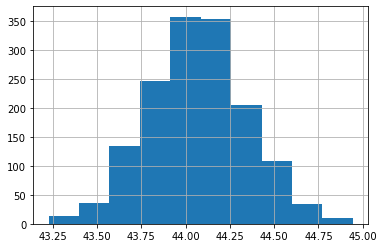

In [106]:
# histograma de las medias de las muestras
muestras.mean().hist();

- Cumple con la primera parte del Teorema

> El teorema del límite central establece que, al aumentar el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal **con una media igual a la media poblacional** y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para n mayor o igual a 30.

In [107]:
# vamos a comparar la media de la poblacion con la media de las muestras

# media de la poblacion
df.Edad.mean()

44.07142113482561

In [108]:
# media de las medias muestrales
muestras.mean().mean()

44.06822166666666

- Cumple con la segunda parte del Teorema

> El teorema del límite central establece que, al aumentar el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media poblacional y **desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra**. Este hecho es válido para n mayor o igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [109]:
# obtener lka desviacion estandar de la media de las muestras
muestras.mean().std()

0.27719059287863484

In [110]:
# obtener la desviacion estandar de vlos datos originales
df.Edad.std()

12.480583465360187

In [111]:
# verifiquemos si se cumple la ecuacion de la desviacion estandar de la muestra
df.Edad.std()/np.sqrt(n)

0.2790743302740527

- Vemos que cumple con la tercera parte del teorema

## <font color=green>4.2 Niveles de confianza y significación</font>
***

El **nivel de confianza** ($1 - \alpha$) representa la probabilidad de que la estimación sea correcta. Además, el **nivel de significación** ($\alpha$) expresa la probabilidad de error de estimación.

El **nivel de confianza** representa el grado de confianza de que el resultado de la estimación se encuentra dentro de un rango determinado. Cuando establecemos un **nivel de confianza** del 95% en una encuesta, por ejemplo, estamos asumiendo que existe un 95% de probabilidad de que los resultados de la encuesta representen bien la realidad, es decir, que sean correctos.

El **nivel de confianza** de una estimación se puede obtener del área bajo la curva normal, como se ilustra en la siguiente figura.

![alt text](https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_4_2_1.png)

## <font color=green>4.3 Error inferencial</font>
***

El **error inferencial** se define por la **desviación estándar de las medias muestrales** $\sigma_\bar{x}$ y por el **nivel de confianza** determinado para el proceso.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confianza</font>
***

### Intervalo de confianza para la media poblacional

#### Con desviación estándar de población conocida

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar de población desconocida

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Ejemplo: </font>

Suponga que los pesos de los sacos de arroz en una industria alimentaria se distribuyen aproximadamente como una normal de **desviación estándar poblacional igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un intervalo de confianza para la **media poblacional** suponiendo un **nivel de significancia del 5 %**.

### Media muestral

In [112]:
media_muestral = 5050
media_muestral

5050

### Nivel de significación ($\alpha$)

In [113]:
significacion = 0.05
significacion

0.05

### Nivel de confianza ($1 - \alpha$)

In [114]:
confianza = 1 - significacion
confianza

0.95

### Obteniendo $z$ de forma manual

In [115]:
# mostrar algunas lineas especificas de la tabla z
tabla_estandarizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


Para este caso vamos a buscar el valor de z asignado al 0.975 que corresponde al limite superior (0.95 + 0.025 de la mitad de significancia). Para este caso z es 1.96

![alt text](https://github.com/ElProfeAlejo/estadisticas_python/raw/main/img_4_2_2.png)

Otra forma de obtener el limite superior de confianza es como sigue:

- El area bajo la curva corresponde al nivel de confianza: 95%
- La mitad de esa area es de 47.5% ya que es una distribucion normal.
- Para encontrar el limite superior de confianza, sumamos 0.5% que es el area desde el infinito hasta la mitad de la distribucion
- Sumando ambas areas obtenes un limite superior de 0.975%

In [116]:
limit_sup = 0.5 + (0.95/2)
limit_sup

0.975

El valor de la tabla que corresponde al nivel de confianza de 0.975 es de 1.96

### Obteniendo $z$ con Python

In [117]:
# obtener el valor de z al pasarle la probabilidad calculada
z = norm.ppf(0.975)
z

1.959963984540054

### Valores de $z$ para los niveles de confianza más utilizados
|Nivel de<br> confianza|Valor del área bajo<br>la curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0.95                               |1.645|
|95%               |0.975                              |1.96 |
|99%               |0.995                              |2.575|

### Obteniendo $\sigma_\bar{x}$

In [118]:
# desviacion estandar de la poblacion
std_poblacion = 150
std_poblacion

150

In [119]:
# numero de muestras
n = 20
# obtener la raiz cuadrada de n
raiz_n = np.sqrt(n)
raiz_n

4.47213595499958

In [120]:
# obtener desviacion estandar de la muestra
std_muestra = std_poblacion/raiz_n
std_muestra

33.54101966249684

### Obteniendo $e$

In [121]:
# obtener el error inferencial
e = z * std_muestra
e

65.73919054324361

### Solución 1 - Cálculo del intervalo de confianza para la media

In [122]:
IC = (
    media_muestral - e,
    media_muestral + e
)
IC

(4984.260809456757, 5115.739190543243)

Hay un 95% de confianza de que todos los sacos de esa industria pesen entre 4984.2g y 5115.7g

### Solución 2 - Cálculo del intervalo de confianza para la media

In [123]:
norm.interval(alpha=0.95, loc= media_muestral, scale=std_muestra)

(4984.260809456757, 5115.739190543243)

# <font color=green>5. TAMAÑO DE UNA MUESTRA</font>
***

## <font color=green>5.1 Variables cuantitativas y población infinita</font>
***

$$e = z \frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar conocida

$$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Con desviación estándar desconocida

$$n = \left(z\frac{s}{e}\right)^2$$

Donde:

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: Rendimiento promedio</font>

Estamos estudiando el ingreso mensual de los jefes de hogar. Nuestro supervisor ha determinado que el **error máximo con relación a la media es $\$$100,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$3323.39**. Para un **nivel de confianza del 95 %**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

### Obteniendo $z$

In [124]:
0.95/2

0.475

In [125]:
confianza = 0.475 + 0.5
confianza

0.975

In [126]:
z = norm.ppf(confianza)
z

1.959963984540054

### Obteniendo $\sigma$

In [127]:
std_poblacional = 3323.39
std_poblacional

3323.39

### Obteniendo $e$

In [128]:
e = 100
e

100

### Obteniendo $n$

In [129]:
n = (z * (std_poblacional/e))**2
n

4242.860955311813

- El tamano de la muestra es de 4243 con los parametros dados

## <font color=green>5.2 Variables cuantitativas y población finita</font>
***

#### Con desviación estándar de la poblacion conocida

$$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Con desviación estándar de la poblacion desconocida

$$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Donde:

$N$ = tamaño de la población

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: industria de refrescos</font>

En un lote de **10000 latas** de refresco, se realizó un muestreo aleatorio simple de **100 latas** y se obtuvo la **desviación estándar muestral del contenido de las latas igual a 12 ml**. El fabricante estipula un **error máximo sobre la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95 %**, ¿qué tamaño de muestra debe seleccionarse para este estudio?

### Obteniendo $N$

In [130]:
N = 10000
N

10000

### Obteniendo $z$

In [131]:
z = norm.ppf(0.975)
z

1.959963984540054

### Obteniendo $s$

In [132]:
std_muestral = 12
std_muestral

12

### Obteniendo $e$

In [133]:
e = 5
e

5

### Obteniendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [134]:
n = ((z**2) * (std_muestral**2) * N)/((z**2)*(std_muestral**2) +((e**2)*(N - 1)))
n

22.080154500190364

- Para realizar este estudio, solo se requieren 22 latas

# <font color=green>6. EJERCICIOS FINALES</font>
***

Estamos estudiando la **renta mensual de los jefes de hogar con renta hasta $\$$5000.00**. Nuestro supervisor ha determinado que el **error máximo con relación a la media es $\$$10**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$1082.79** y que la **media poblacional** es **$\$$1426.54**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio? Y ¿Cuál es el intervalo de confianza para la media considerando el tamaño de muestra obtenido?

### Construyendo el dataset según lo especificado por el problema
Vamos a obtener los datos del enunciado directamente de nuestros datos. Esto para que en futuros problemas donde no tengas cierta informacion puedas obtenerlas por tus propios medios

In [135]:
renta_5000 = df.query('Renta <= 5000').Renta
renta_5000.head()

0     800
1    1150
2     880
3    3500
4     150
Name: Renta, dtype: int64

In [136]:
# Desviacion estandar muestral
std_muestral = renta_5000.std()
std_muestral

1082.794549030635

In [137]:
# media poblacional
media_p = renta_5000.mean()
media_p

1426.5372144947232

### Cálculo del tamaño de la muestra

In [138]:
# calculo de z
z = norm.ppf(0.975)
z

1.959963984540054

In [139]:
# calculo del error
e = 10
e

10

In [140]:
# calculo del tamano de la poblacion
n = (z * std_muestral/e)**2
n = int(n.round())
n

45039

- El tamano de la muestra deberia ser de 45039 individuos para cumplir con los requerimientos dados

### Cálculo del intervalo de confianza para la media

In [141]:
# calculo del intervalos de confianza con norm
intervalo = norm.interval(alpha=0.95, loc= media_p, scale=std_muestral/np.sqrt(n))
intervalo

(1416.5372195108241, 1436.5372094786223)

### Realizando una prueba gráfica

<AxesSubplot:>

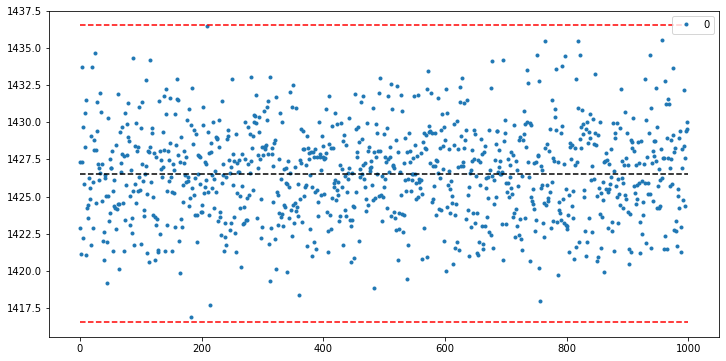

In [142]:
import matplotlib.pyplot as plt

# exxtraer mil muestras
tamaño_simulacion = 1000

medias = [renta_5000.sample(n = n).mean() for i in range(1, tamaño_simulacion)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media_p, xmin = 0, xmax = tamaño_simulacion, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamaño_simulacion, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamaño_simulacion, colors='red', linestyles='dashed')
ax

# <font color='green'>Problema A</font>

Evaluando nuestro dataset, es posible verificar que la **proporción de hombres** como jefes del hogar es de casi el **70%**. Necesitamos **seleccionar aleatoriamente grupos de 10 personas** para buscar diferencias en los ingresos de cada grupo. ¿Cuál es la **probabilidad de seleccionar un grupo que presente la misma proporción de la población**, es decir, seleccionar un grupo que esté **compuesto por 7 hombres y 3 mujeres**?

#### <font color='blue'>Como tarea adicional, verifique la proporción real de hombres y mujeres en nuestro dataset.</font>

#### <font color='red'>Compruebe qué tipo de distribución de probabilidad se ajusta a este diseño.</font>

### Solución

In [143]:
k = 7
n = 10
p = 0.70
proba = binom.pmf(k, n, p)
print('%0.8f' % (proba))

0.26682793


# <font color='green'>Problema B</font>

Continuando con la pregunta anterior, **cuántos grupos de 10 personas** tendríamos que seleccionar al azar para obtener **100 grupos compuestos por 7 hombres y 3 mujeres**?

#### <font color='red'>Recuerde cómo calcular la media de una distribución binomial</font>

### Solución

### Media de la distribución binomial

$$\mu=nXp$$

In [146]:
# despejamos n
n = 100 / proba
n = int(n.round())
n

375

# <font color='green'>Problema C</font>

Un cliente nos encargó realizar un estudio para evaluar los **ingresos de los jefes de hogar**. Para ello, necesitamos realizar una nueva colecta de datos, es decir, una nueva investigación de campo. Después de la reunión con el cliente, fue posible enumerar el siguiente conjunto de informaciones:

> A. El resultado de la encuesta debe estar listo en **2 meses**;

> B. Solo tendremos **$\$$150000.00** en recursos para realizar la investigación de campo; y
    
> C. Sería interesante un **margen de error no superior al 10% con respecto a la media estimada**.

En nuestra experiencia con estudios de este tipo, sabemos que el **costo promedio por entrevistado ronda los $\$$100.00**. Con este conjunto de hechos, evalúe y obtenga el siguiente conjunto de informaciones para transmitir al cliente:


> 1. Para obtener una estimación de los parámetros de la población (ingresos de los jefes del hogar), realice un muestreo aleatorio simple en nuestro conjunto de datos. Esta muestra debe contener 200 elementos (use random_state = 101 para asegurarse de que el mismo experimento se puede realizar nuevamente). Obtenga la media y la desviación estándar de esta muestra.
    
> 2. Para el **margen de error** especificado por el cliente, obtener los **tamaños de muestra** necesarios para garantizar los **90%, 95% y 99% de confianza**.
    
> 3. Obtenga el **costo de la investigación** para los tres niveles de confianza.
    
> 4. Para el nivel de confianza más alto (dentro del presupuesto disponible), obtenga un **intervalo de confianza para la media de la población**.
    
> 5. Asumiendo el **nivel de confianza elegido en el ítem anterior**, ¿qué **margen de error** se puede considerar utilizando todos los recursos puestos a disposición por el cliente?
    
> 6. Suponiendo un **nivel de confianza del 95%**, **cuánto le costaría al cliente la encuesta** si se considerara un **margen de error de solo el 5%** en relación con la media estimada?

# <font color='blue'>Solución para el punto 1</font>

### Selección de una muestra aleatoria simple

#### <font color='red'>Recuerde usar *random_state = 101*</font>

In [147]:
dataset = df.Renta.sample(n = 200, random_state=101)

In [148]:
dataset.mean()

1964.205

In [149]:
dataset.std()

3139.8855167452157

### Datos del problema

In [150]:
# guardamos datos relevantes en variables
media_muestral = dataset.mean()
std_muestral = dataset.std()
recursos = 15000
costo_entrevista = 100

# <font color='blue'>Solución para el punto 2</font>

### Obtener el margen de error

#### <font color='red'>Recuerde que el margen de error debe estar en la misma unidad que la variable en estudio ($)</font>

In [151]:
e = 0.10 * media_muestral
print('El margen de error es aproximadamente de $%0.2f' % (e))

El margen de error es aproximadamente de $196.42


### Tamaño de la muestra ($1 - \alpha = 90\%$)

In [152]:
# calcular area bajo la curva
0.5 + (0.9/2)

0.95

In [145]:
# calcular nivel de confianza del 90%

print('Para un nivel de confianza del 90%% debemos seleccionar una muestra de %s elementos.' % n_confianza_90)

NameError: name 'n_confianza_90' is not defined

### Tamaño de la muestra ($1 - \alpha = 95\%$)

In [ ]:

print('Para un nivel de confianza del 95%% debemos seleccionar una muestra de %s elementos.' % n_confianza_95)

### Tamaño de la muestra ($1 - \alpha = 99\%$)

In [ ]:

print('Para un nivel de confianza del 99%% debemos seleccionar una muestra de %s elementos.' % n_confianza_99)

# <font color='blue'>Solución para el punto 3</font>

### Coste de la encuesta para un nivel de confianza del 90%

In [ ]:

print('Para un nivel de confianza del 90%, el costo de la encuesta sería $ {:,.2f}.'.format(costo_confianza_90))

### Coste de la encuesta para un nivel de confianza del 95%

In [ ]:

print('Para un nivel de confianza del 95%, el costo de la encuesta sería $ {:,.2f}.'.format(costo_confianza_95))

### Coste de la encuesta para un nivel de confianza del 99%

In [ ]:

print('Para un nivel de confianza del 99%, el costo de la encuesta sería $ {:,.2f}.'.format(costo_confianza_99))

# <font color='blue'>Solución para el punto 4</font>

# <font color='blue'>Solución para el punto 5</font>

In [ ]:

print('El nuevo margen de error es {:.2f}%.'.format(e_porcentual * 100))

# <font color='blue'>Solución para el punto 6</font>

In [ ]:

print('El margen de error es aproximadamente de $%0.2f' % (e))

In [ ]:

print('Para un nivel de confianza del 95%% debemos seleccionar una muestra de %s elementos.' % n_confianza_95)

In [ ]:

print('Para un nivel de confianza del 95%, el costo de la encuesta sería de ${:,.2f}.'.format(costo_confianza_95))